In [1]:
import sklearn as sk
import numpy as np
import scipy
import pandas
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import six
import pydotplus

In [2]:
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from six import StringIO
from IPython.display import Image
sys.modules['sklearn.externals.six'] = six


In [3]:
true_data = pd.read_csv('./True.csv')
fake_data = pd.read_csv('./Fake.csv')
#Add target for supervised learning
true_data['target'] = 'true'
fake_data['target'] = 'fake'
total_data = pd.concat([true_data, fake_data])
wo_target_data = total_data.drop(['target'], axis = 1)
total_data.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [4]:
total_data.isna().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

#Creating the bag of words
cv_data = CountVectorizer().fit(total_data['text'])

news_cv = cv_data.transform(total_data['text'])

#TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

tf_data = TfidfTransformer().fit(news_cv)
news_tf = tf_data.transform(news_cv)
print(news_tf.shape)

(44898, 122002)


In [6]:
#Decision Tree

X = news_tf
y = total_data.target


decision_tree = tree.DecisionTreeClassifier( criterion='entropy')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
print(X_train.shape)
clf = decision_tree.fit(X_train, y_train)
y_pred = clf.predict(X_test)

(35918, 122002)


In [7]:
print (classification_report(y_test, y_pred))
print("\n accuracy: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))

              precision    recall  f1-score   support

        fake       1.00      1.00      1.00      4696
        true       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980


 accuracy: 99.61%


In [8]:
##Decision Tree Visualized
dot_data = StringIO()

# Creates dot file named tree.dot
export_graphviz(
            clf,
            out_file = dot_data,
            filled = True,
            rounded = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.write_png('Heart_Disease_DT.png',)
Image(graph.create_png())

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

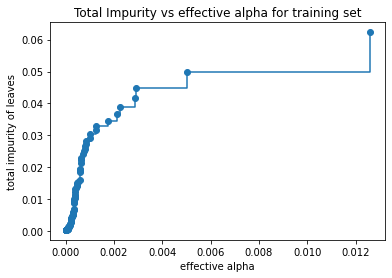

In [9]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [10]:
#PrunedDecision Tree

Xp = news_tf
yp = total_data.target


decision_tree_pruned = tree.DecisionTreeClassifier(max_depth = 8, criterion='entropy', ccp_alpha = 0.0005)

X_trainp, X_testp, y_trainp, y_testp = train_test_split(Xp, yp, test_size=0.2, random_state=20)
print(X_train.shape)
clfp = decision_tree_pruned.fit(X_trainp, y_trainp)
y_predp = clfp.predict(X_testp)

print (classification_report(y_testp, y_predp))
print("\n accuracy: {}%".format(round(accuracy_score(y_testp, y_predp)*100,2)))

(35918, 122002)
              precision    recall  f1-score   support

        fake       1.00      1.00      1.00      4696
        true       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980


 accuracy: 99.67%


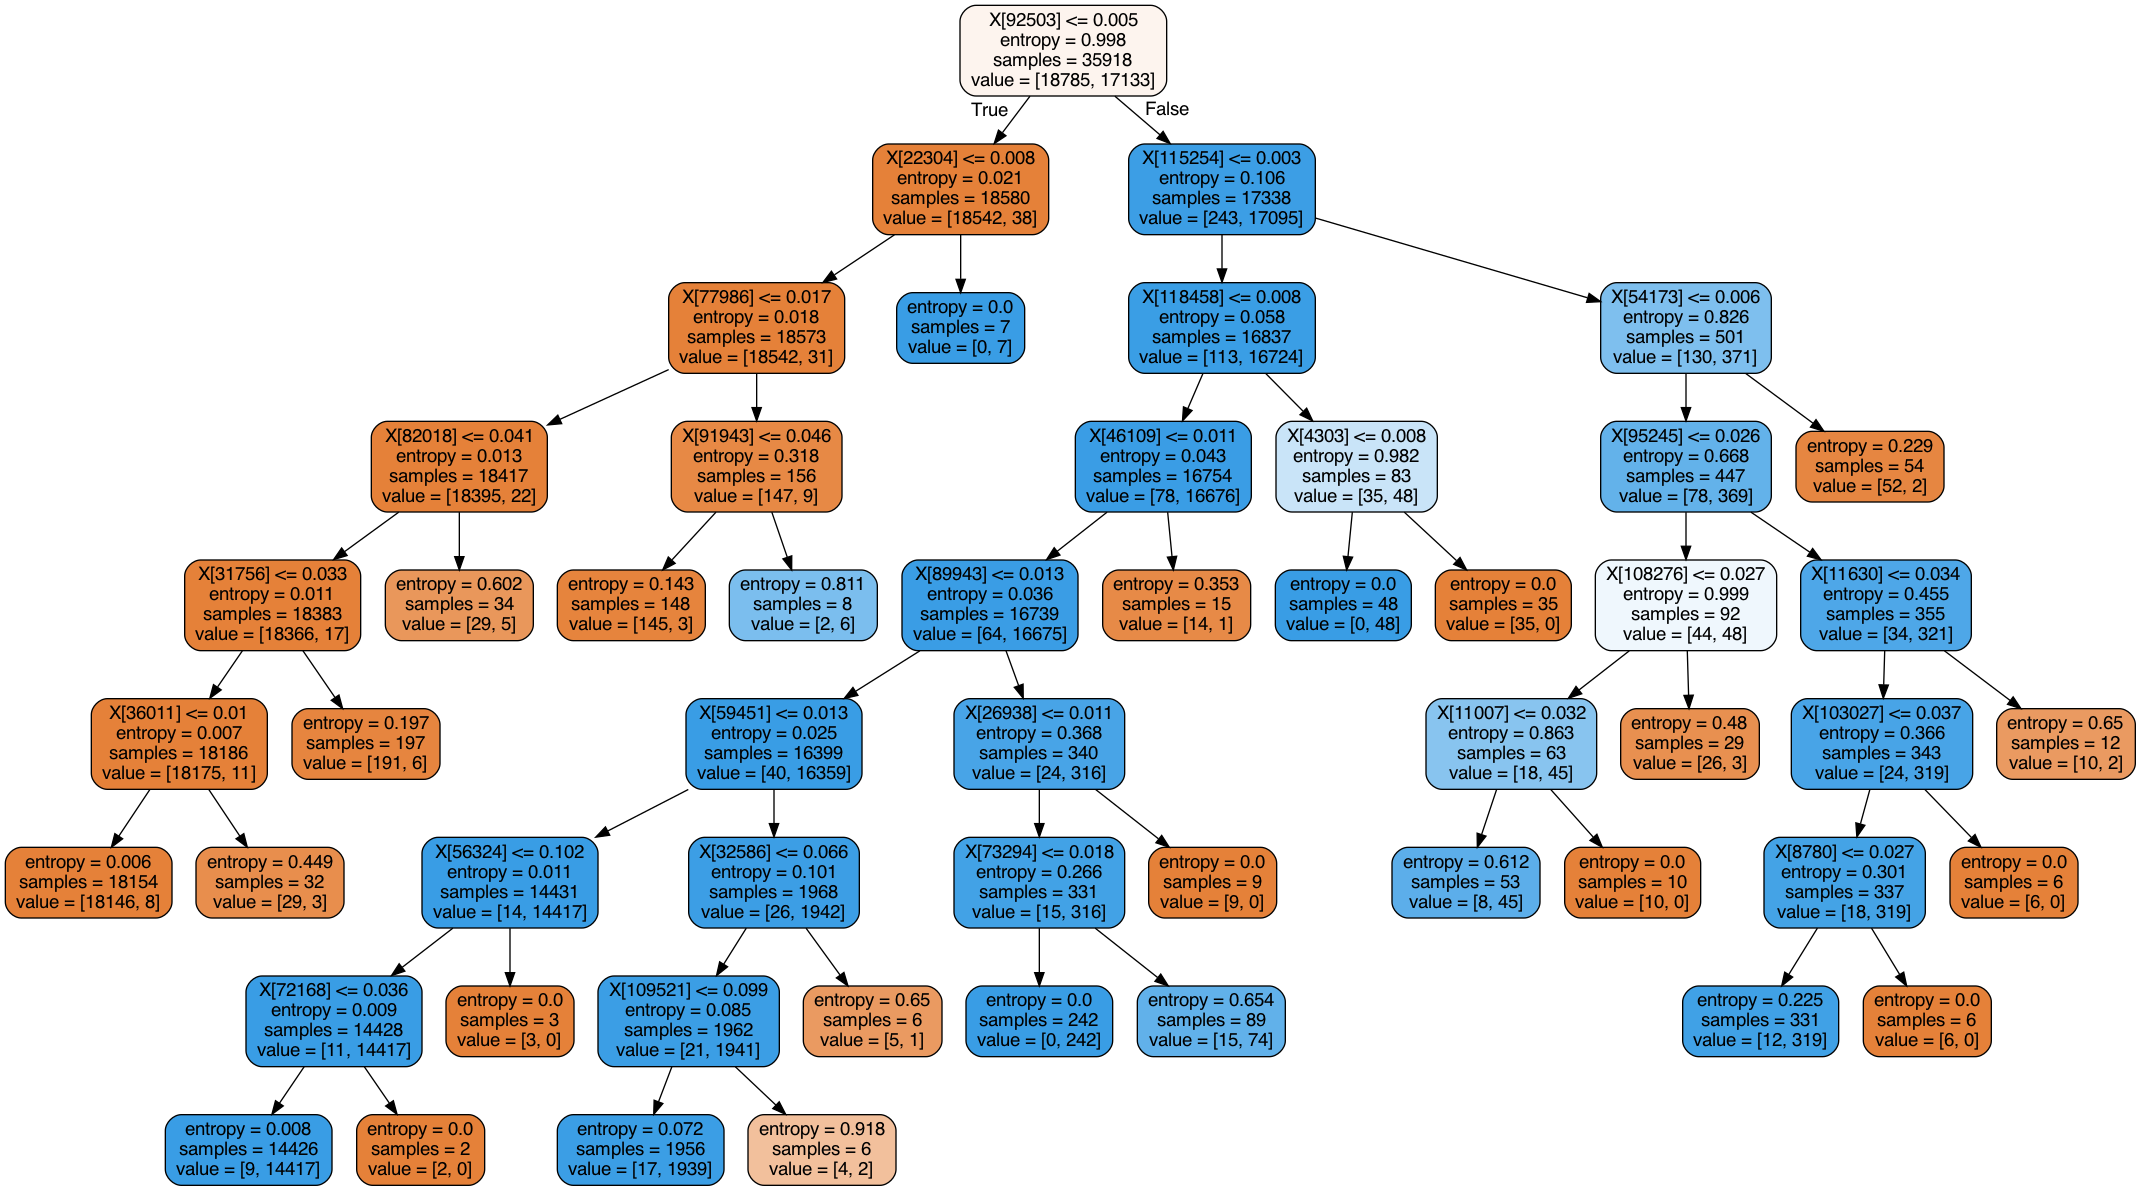

In [11]:
##Pruned Decision Tree Visualized
dot_data = StringIO()

# Creates dot file named tree.dot
export_graphviz(
            clfp,
            out_file = dot_data,
            filled = True,
            rounded = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.write_png('Heart_Disease_DT.png',)
Image(graph.create_png())

In [12]:
#Random Forest

X = news_tf
y = total_data.target
accuracy_score_array = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

classifier = RandomForestClassifier(n_estimators=20, random_state=0, max_features=0.01) 

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy_score_array.append(round(accuracy_score(y_test, y_pred)*100,2))

print (classification_report(y_test, y_pred))
print("\n accuracy: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))

              precision    recall  f1-score   support

        fake       0.99      1.00      1.00      4670
        true       1.00      0.99      1.00      4310

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980


 accuracy: 99.54%


In [13]:
#Random Forest

X = news_tf
y = total_data.target

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=0)

classifier = RandomForestClassifier(n_estimators=20, random_state=0, max_features='sqrt') 
classifier.fit(X_train2, y_train2)
y_pred2 = classifier.predict(X_test2)
#accuracy_score_array.append(round(accuracy_score(y_test2, y_pred2)*100,2))


print (classification_report(y_test2, y_pred2))
#print("\n accuracy: {}%".format(round(accuracy_score(y_test2, y_pred2)*100,2)))

              precision    recall  f1-score   support

        fake       0.98      0.99      0.98      4670
        true       0.99      0.97      0.98      4310

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



ValueError: Found input variables with inconsistent numbers of samples: [8980, 35918]

In [16]:
#Random Forest

X = news_tf
y = total_data.target

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=0)

classifier = RandomForestClassifier(n_estimators=100, random_state=0, max_features='sqrt') 
classifier.fit(X_train3, y_train3)
y_pred3 = classifier.predict(X_test3)
accuracy_score_array.append(round(accuracy_score(y_test3, y_pred3)*100,2))

print (classification_report(y_test3, y_pred3))
print("\n accuracy: {}%".format(round(accuracy_score(y_test3, y_pred3)*100,2)))

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4670
        true       0.99      0.99      0.99      4310

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


 accuracy: 98.8%


In [17]:
#Random Forest

X = news_tf
y = total_data.target

X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.2, random_state=0)

classifier = RandomForestClassifier(n_estimators=160, random_state=0, max_features='sqrt') 
classifier.fit(X_train4, y_train4)
y_pred4 = classifier.predict(X_test4)
accuracy_score_array.append(round(accuracy_score(y_test4, y_pred4)*100,2))

print (classification_report(y_test4, y_pred4))
print("\n accuracy: {}%".format(round(accuracy_score(y_test4, y_pred4)*100,2)))

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4670
        true       0.99      0.99      0.99      4310

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


 accuracy: 98.92%


In [19]:
#Random Forest

X = news_tf
y = total_data.target

X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.2, random_state=0)

classifier = RandomForestClassifier(n_estimators=300, random_state=0, max_features='sqrt') 
classifier.fit(X_train4, y_train4)
y_pred4 = classifier.predict(X_test4)
accuracy_score_array.append(round(accuracy_score(y_test4, y_pred4)*100,2))

print (classification_report(y_test4, y_pred4))
print("\n accuracy: {}%".format(round(accuracy_score(y_test4, y_pred4)*100,2)))

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4670
        true       0.99      0.99      0.99      4310

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


 accuracy: 98.94%


In [20]:
#Random Forest

X = news_tf
y = total_data.target

X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.2, random_state=0)

classifier = RandomForestClassifier(n_estimators=600, random_state=0, max_features='sqrt') 
classifier.fit(X_train4, y_train4)
y_pred4 = classifier.predict(X_test4)
accuracy_score_array.append(round(accuracy_score(y_test4, y_pred4)*100,2))

print (classification_report(y_test4, y_pred4))
print("\n accuracy: {}%".format(round(accuracy_score(y_test4, y_pred4)*100,2)))

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4670
        true       0.99      0.99      0.99      4310

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


 accuracy: 99.02%


In [21]:
#Random Forest

X = news_tf
y = total_data.target

X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.2, random_state=0)

classifier = RandomForestClassifier(n_estimators=1000, random_state=0, max_features='sqrt') 
classifier.fit(X_train4, y_train4)
y_pred4 = classifier.predict(X_test4)
accuracy_score_array.append(round(accuracy_score(y_test4, y_pred4)*100,2))

print (classification_report(y_test4, y_pred4))
print("\n accuracy: {}%".format(round(accuracy_score(y_test4, y_pred4)*100,2)))

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4670
        true       0.99      0.99      0.99      4310

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


 accuracy: 99.08%


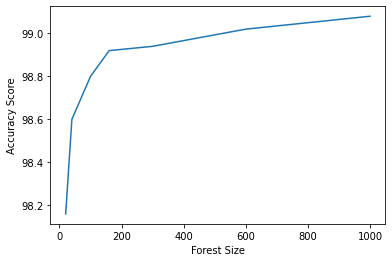

In [29]:
x = np.array([20,40,100,160, 300, 600, 1000])
plt.plot(x,accuracy_score_array)
plt.xlabel('Forest Size')
plt.ylabel('Accuracy Score')
plt.show()

In [14]:
# Neural Network
from sklearn.neural_network import MLPClassifier

X = news_tf
y = total_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
mlp = MLPClassifier(hidden_layer_sizes=(1), max_iter = 100)
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
print(classification_report(y_test,y_pred))
print("\n accuracy: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))

              precision    recall  f1-score   support

        fake       1.00      0.99      0.99      4696
        true       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


 accuracy: 99.44%


0.5235844387250049
Accuracy of using 3 neurons in the hidden layer: %0.4f 0.5175946547884187


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9988306698591236
Accuracy of using 7 neurons in the hidden layer: %0.4f 0.9932071269487751


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9986636120656739
Accuracy of using 13 neurons in the hidden layer: %0.4f 0.9924276169265034
0.523980993392234
Accuracy of using 21 neurons in the hidden layer: %0.4f 0.5214922048997773


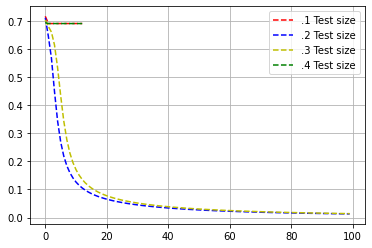

In [8]:
#From Lab 2 [2] cite seng474 lab


import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import numpy as np

X_scaled = news_tf
y_digits = total_data.target


trainData,testData,trainLabel,testLabel =train_test_split(X_scaled,y_digits,test_size=0.1)

clf_1 = MLPClassifier(hidden_layer_sizes=(1), max_iter=100, alpha=1e-4,solver='sgd', learning_rate_init=.01)
clf_1.fit(trainData,trainLabel)
print(clf_1.score(trainData,trainLabel))
print("Accuracy of using 3 neurons in the hidden layer: %0.4f",clf_1.score(testData,testLabel))



trainData,testData,trainLabel,testLabel =train_test_split(X_scaled,y_digits,test_size=0.2)

clf_2 = MLPClassifier(hidden_layer_sizes=(1), max_iter=100, alpha=1e-4,solver='sgd', learning_rate_init=.01)
clf_2.fit(trainData,trainLabel)
print(clf_2.score(trainData,trainLabel))
print("Accuracy of using 7 neurons in the hidden layer: %0.4f",clf_2.score(testData,testLabel))


trainData,testData,trainLabel,testLabel =train_test_split(X_scaled,y_digits,test_size=0.3)


clf_3 = MLPClassifier(hidden_layer_sizes=(1), max_iter=100, alpha=1e-4,solver='sgd', learning_rate_init=.01)
clf_3.fit(trainData,trainLabel)
print(clf_3.score(trainData,trainLabel))
print("Accuracy of using 13 neurons in the hidden layer: %0.4f",clf_3.score(testData,testLabel))


trainData,testData,trainLabel,testLabel =train_test_split(X_scaled,y_digits,test_size=0.4)

clf_4 = MLPClassifier(hidden_layer_sizes=(1), max_iter=100, alpha=1e-4,solver='sgd', learning_rate_init=.01)
clf_4.fit(trainData,trainLabel)
print(clf_4.score(trainData,trainLabel))
print("Accuracy of using 21 neurons in the hidden layer: %0.4f",clf_4.score(testData,testLabel))

plt.plot(clf_1.loss_curve_,'r--', label='.1 Test size')
plt.plot(clf_2.loss_curve_,'b--',label='.2 Test size')
plt.plot(clf_3.loss_curve_,'y--',label='.3 Test size')
plt.plot(clf_4.loss_curve_,'g--',label='.4 Test size')
plt.grid('True')
plt.legend()
plt.show()

In [6]:
# Neural Network
from sklearn.neural_network import MLPClassifier

X = news_tf
y = total_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
mlp = MLPClassifier(hidden_layer_sizes=(1), max_iter = 100, learning_rate='constant')
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
print(classification_report(y_test,y_pred))
print("\n accuracy: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))


X = news_tf
y = total_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
mlp = MLPClassifier(hidden_layer_sizes=(1), max_iter = 100, learning_rate='invscaling')
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
print(classification_report(y_test,y_pred))
print("\n accuracy: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))


X = news_tf
y = total_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
mlp = MLPClassifier(hidden_layer_sizes=(1), max_iter = 100, learning_rate='adaptive')
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
print(classification_report(y_test,y_pred))
print("\n accuracy: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))

              precision    recall  f1-score   support

        fake       0.99      1.00      0.99      4696
        true       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


 accuracy: 99.31%
              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4696
        true       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


 accuracy: 99.33%
              precision    recall  f1-score   support

        fake       0.99      1.00      0.99      4696
        true       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99   